<a href="https://colab.research.google.com/github/reinereng/DNC/blob/main/Desafio_05_Dataset%20para%20a%20modelagem%20de%20dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASET PARA MODELAGEM DE DADOS**

Desafio 05 do curso de Formação de Dados da DNC. O foco desta atividade é aplicar os conhecimentos de Limpeza e organização de dados (*data cleaning* & *data wrangling*)

---
## **Contexto**

Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de
recência, frequência e ticket médio (RFM) dos seus clientes. A saber RFM:
* **R (Recency):** Tempo que o cliente realizou a última compra (em dias)
* **F (Frequency)**: Quantidade de compras realizadas pelo cliente
* **M (Monetary):** Valor do ticket médio gasto pelo cliente

onde ticket médio = média do total gasto por pedido para cada cliente.

**OBJETIVO:** construir um código em Python que gera um output também csv, porém contendo apenas a identificação do cliente e métricas RFM

In [2]:
!pip install pandas-profiling
!pip install sidetable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0f91560bf9fbf436ca37099c9774313bb336ebb34cd39d13564fe52419f0db5d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

<ipython-input-3-c5fdd6fb58fd>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
# Banco de dados do projeto
df = pd.read_csv('/content/drive/MyDrive/Repositório Git/DNC/Desafio 05/data.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Crie o relatório
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **LIMPEZA DOS DADOS - DATA CLEANING**

## *Dados Faltantes*
Remoção de dados faltantes do cliente, são mais de 135.000 dados - (25%). Sugestão: Averiguar os motivos desses dados estarem faltando.

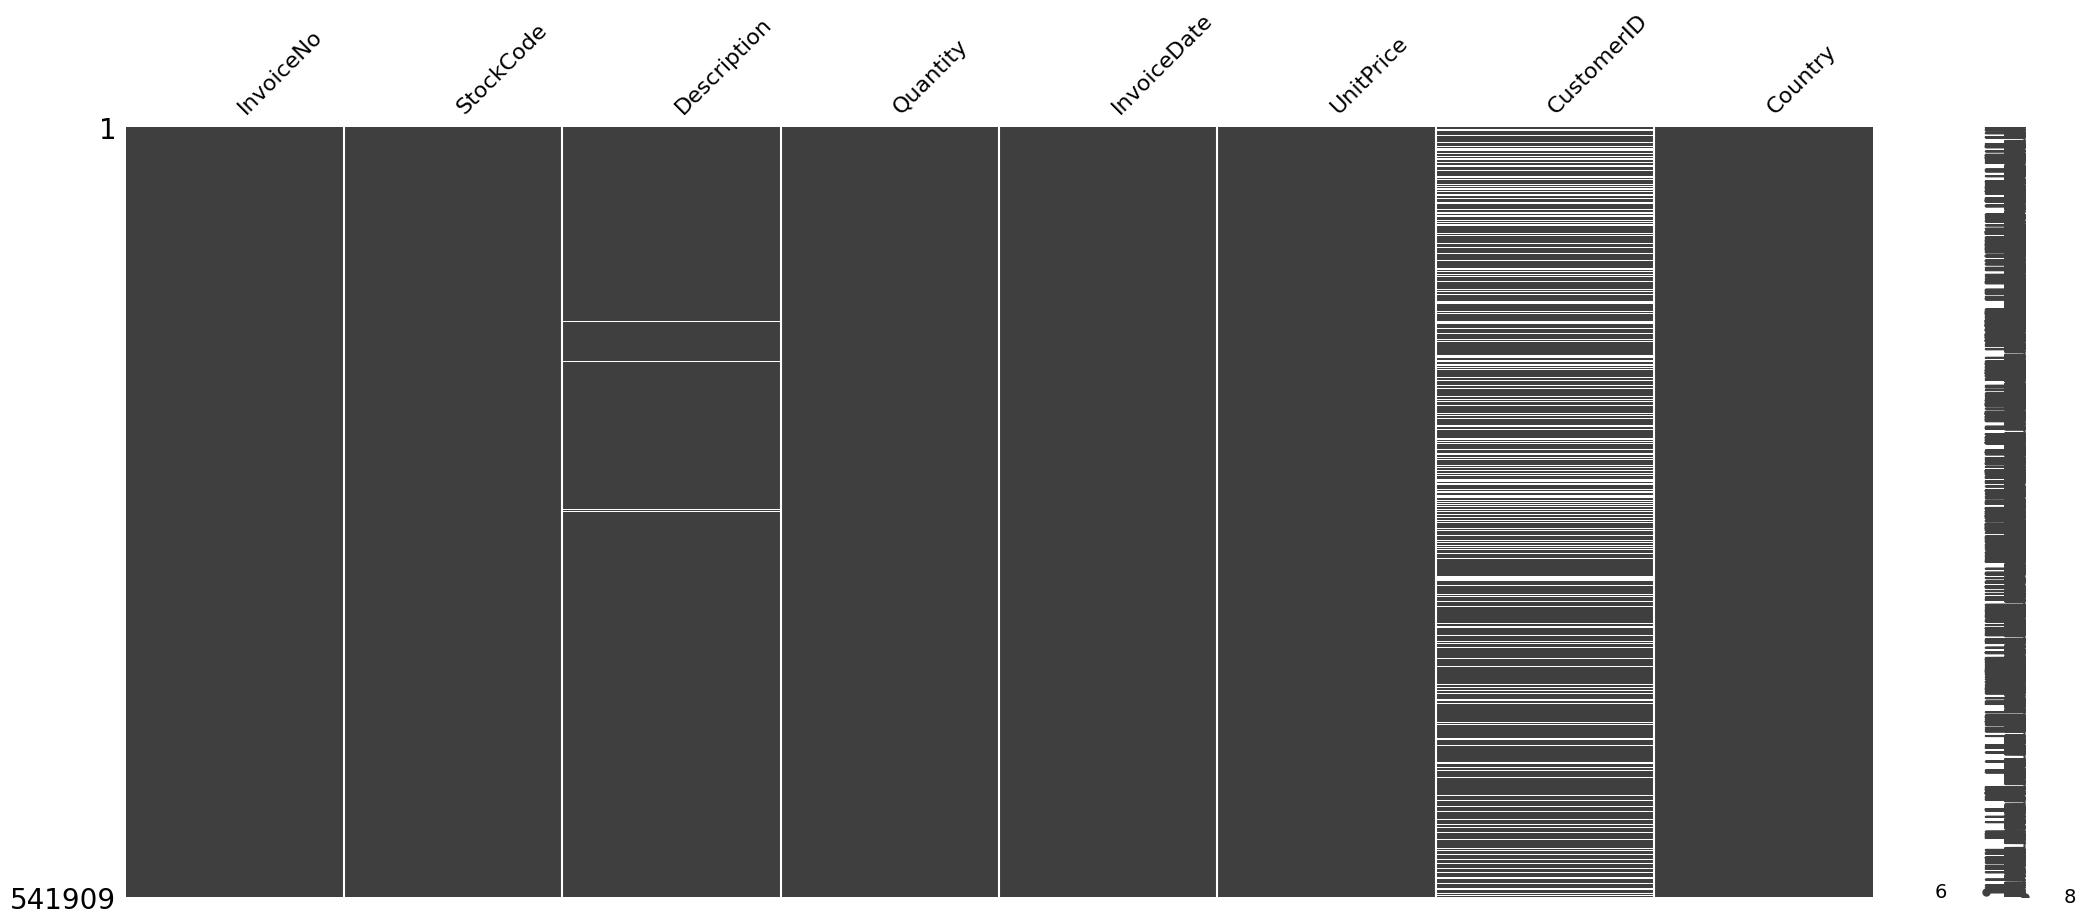

In [7]:
# Resumindo os dados que estão faltando, no formato de Gráfico
msno.matrix(df);

In [8]:
# Resumindo os dados que estão faltando, no formato de tabela
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [9]:
# FILTRANDO PARA VALORES NÃO NULOS
df = df[~df['CustomerID'].isna()]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
#Verificando se ainda há valores faltantes
df.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0



## *Dados Duplicados*
Remoção de dados dos dados duplicados, pois não tem sentido duas compras do mesmo cliente no mesmo horários.

In [11]:
# Identificar quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(10)
)


n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6
541266    21754     HOME BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
          21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6
578289    23395     BELLE JARDINIERE CUSHION COVER      1        11/23/2011 14:07 3.75      17841.0    United Kingdom             6
550331    85202     HANGING WOOD AND FELT HEART         1        4/17/2011 13:43  0.42      15555.0    United Kingdom             5

In [12]:
df = df.drop_duplicates(keep='first')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Retirada de valores sem sentido
* Preços unitários iguais ou menores que zero
* Quantidade de Produtos iguais ou menores que zero

In [13]:
# Fazendo um filtro para retirar linhas com Preços unitários e
# Quantidade de Produtos menores ou iguais a zero:
condicao1 = df['UnitPrice'] > 0
condicao2 = df['Quantity'] > 0
df = df.loc[condicao1 & condicao2]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Correção do tipo de dados

In [14]:
df.InvoiceDate = df.InvoiceDate.astype('datetime64')
df.CustomerID = df.CustomerID.astype('int')

# IDENTIFICAÇÃO/REMOÇÃO VALORES EXTREMOS (OUTLIERS)

<Axes: >

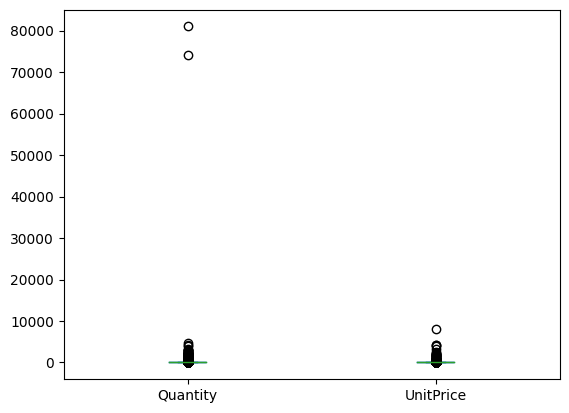

In [15]:
#Gráfico BoxPlot para identificação de Outliers. Não tem sentido aplicar no código do cliente.
df[['Quantity','UnitPrice']].plot.box()



In [16]:
# Cliente pediu para retirar os valores extremos as seguir:
condicao1 = df['UnitPrice'] <= 5000
condicao2 = df['Quantity'] <= 10000
df = df.loc[condicao1 & condicao2]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<Axes: >

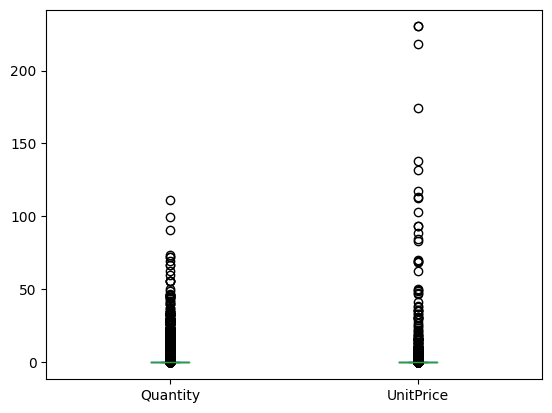

In [17]:
# Box plot com dados padronizados
df[['Quantity','UnitPrice']].apply(scale).plot.box()

# ALGUMAS MÉTRICAS

## Valor Total da Compra


In [37]:
df['Valor Total da Compra'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Valor Total da Compra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Data da última compra



In [92]:
data_maxima = df.InvoiceDate.max()
print(data_maxima)

2011-12-09 12:50:00


# GRÁFICOS

## Top 10 países com maior valor em vendas


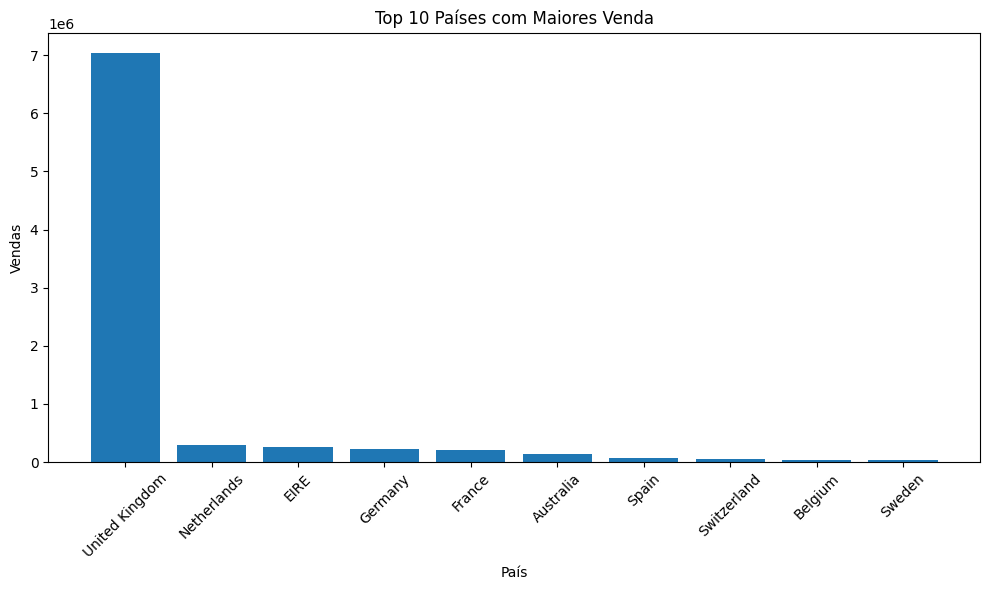

In [66]:
top_10 = df.groupby('Country')['Valor Total da Compra'].sum().reset_index().sort_values(by = 'Valor Total da Compra', ascending = False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10['Country'], top_10['Valor Total da Compra'])

plt.xlabel('País')
plt.ylabel('Vendas')
plt.title('Top 10 Países com Maiores Venda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 produtos mais vendidos


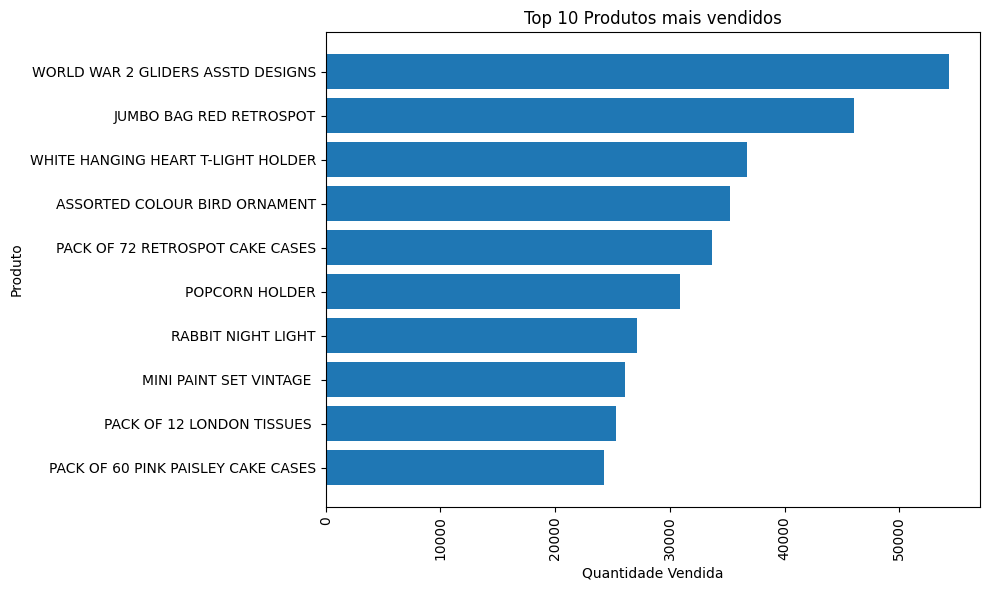

In [79]:
#df_top10 = df.loc[df['Country'] != 'Unspecified']
top_10 = df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False).head(10)

top_10 = top_10.sort_values(by = 'Quantity', ascending = True)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10['Description'], top_10['Quantity'])

plt.ylabel('Produto')
plt.xlabel('Quantidade Vendida')
plt.title('Top 10 Produtos mais vendidos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Valor de venda total por mês



<ipython-input-89-73156de5ff5e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df_index.resample('M').sum().sort_index()


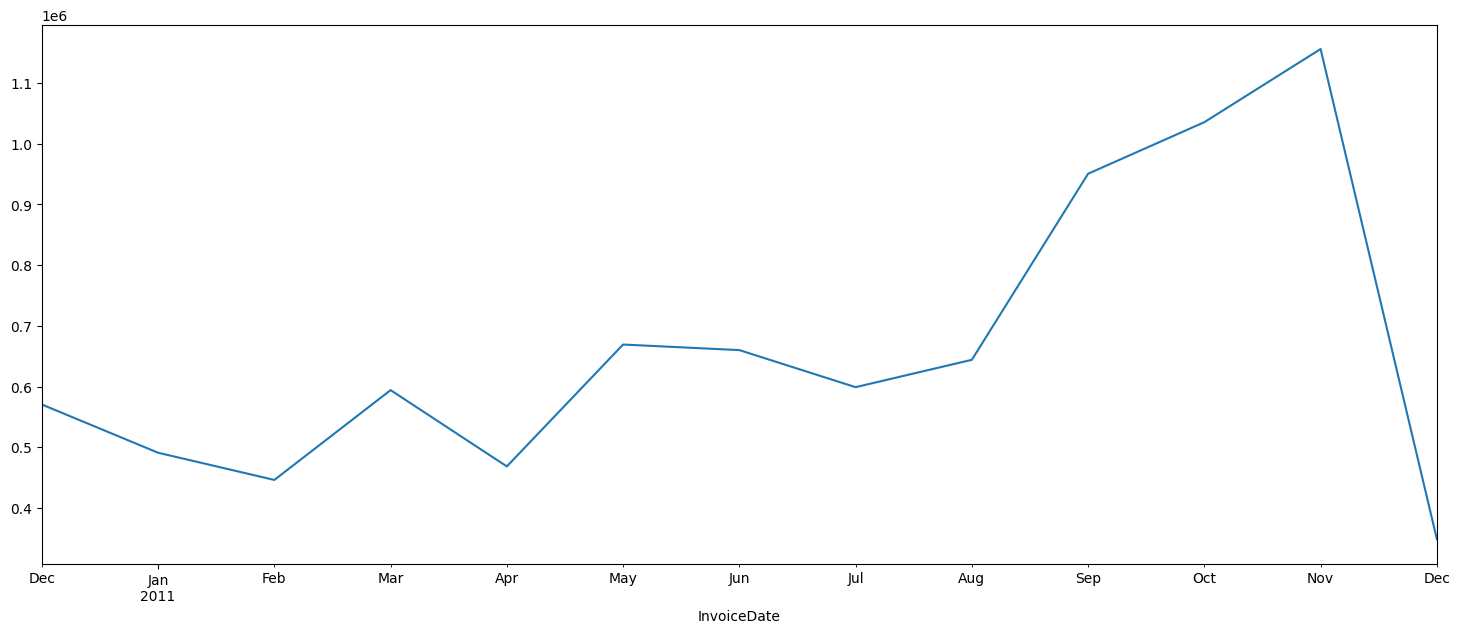

In [89]:
df_index = df.set_index('InvoiceDate').sort_index()

df_monthly = df_index.resample('M').sum().sort_index()

# Plot sem tratamento de ruídos com rolling filter
plt.figure(figsize=(18,7))
df_monthly['Valor Total da Compra'].plot();


## Valor de venda total por mês e por país (Top 10)

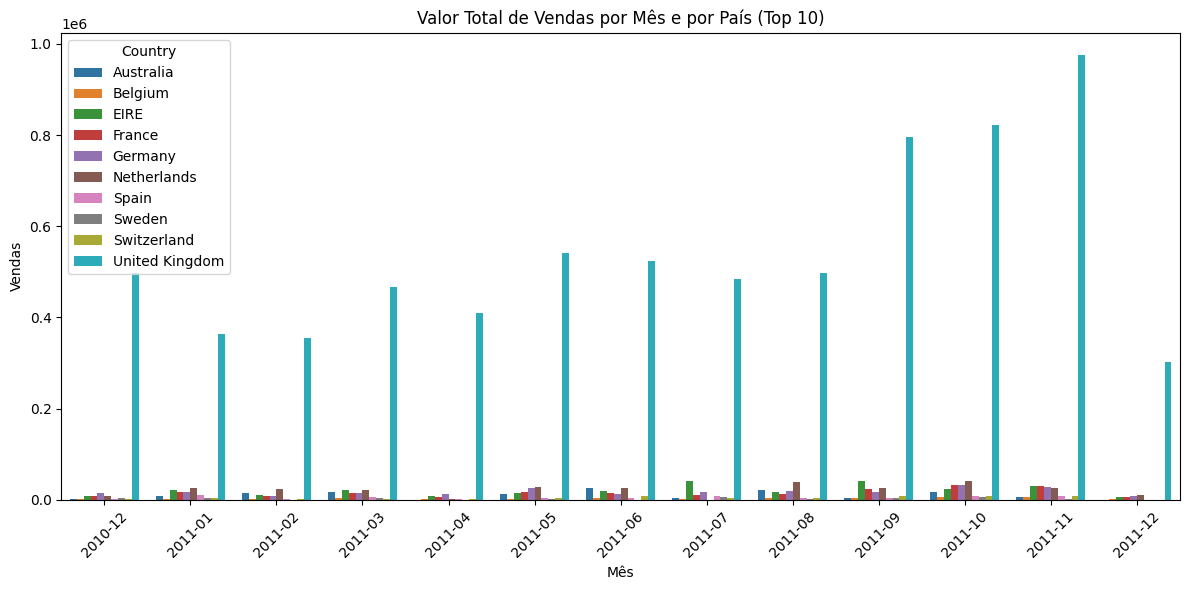

In [90]:
# top_10 = df.groupby('Country')['Valor Total da Compra'].sum().reset_index().sort_values(by = 'Valor Total da Compra', ascending = False).head(10)


df_grouped = df.groupby([df['InvoiceDate'].dt.strftime('%Y-%m'), 'Country'])['Valor Total da Compra'].sum().reset_index()

# Selecionar os top 10 países com base no valor total de vendas
top_10_paises = df_grouped.groupby('Country')['Valor Total da Compra'].sum().nlargest(10).index

df_top_10 = df_grouped[df_grouped['Country'].isin(top_10_paises)]

# Plotar um gráfico de barras para visualizar os resultados
plt.figure(figsize=(12, 6))
sns.barplot(x='InvoiceDate', y='Valor Total da Compra', hue='Country', data=df_top_10)
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Valor Total de Vendas por Mês e por País (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cálculo do RFM

In [107]:
# Calculo da recência (R)
df['Recência'] = (data_maxima - df['InvoiceDate']).dt.days
df_Recencia = df.groupby(['CustomerID'])['Recência'].min().reset_index()  # Usar a recência mínima para cada cliente
df_Recencia.columns = ['CustomerID', 'Recência']

# Calculo da frequência (F)
df_frequencia = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_frequencia.columns = ['CustomerID', 'Frequência']

# Calculo do ticket médio (M)
df_ticket_medio = df.groupby('CustomerID')['Valor Total da Compra'].mean().reset_index()
df_ticket_medio.columns = ['CustomerID', 'Ticket Médio']

# Unindo os resultados em um único DataFrame

df_rfm = df_Recencia.merge(df_frequencia, on='CustomerID')
df_rfm = df_rfm.merge(df_ticket_medio, on='CustomerID')

df_rfm.head()

,CustomerID,Recência,Frequência,Ticket Médio
0,12347,1,7,23.681319
1,12348,74,4,57.975484
2,12349,18,1,24.076027
3,12350,309,1,19.670588
4,12352,35,8,29.482824


# ARQUIVO EM CSL COM OS VALORES ESTRUTURADOS

In [108]:
caminho_arquivo_csv = 'rfm_data.csv'

df_rfm.to_csv(caminho_arquivo_csv, index=False)

print(f'Dados salvos em {caminho_arquivo_csv}')

Dados salvos em rfm_data.csv
